# Importing all the Libraries

In [80]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import pandas as pd

# Importing data using Pandas

In [81]:
# Reading Data from CSV and removing unwanted index Column
import nltk
nltk.download('stopwords')
df = pd.read_csv('/content/drive/MyDrive/Emoji Data/Train.csv')
df = df.drop(columns=['Unnamed: 0'], )
corpus = list()
ps = PorterStemmer()
sw = set(stopwords.words('english'))
nsw = {'no', 'not', 'what', 'when', 'where', 'how', 'whom', 'which'}

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [82]:
df.head()

,TEXT,Label
0,Vacation wasted ! #vacation2017 #photobomb #ti...,0
1,"Oh Wynwood, you’re so funny! : @user #Wynwood ...",1
2,Been friends since 7th grade. Look at us now w...,2
3,This is what it looks like when someone loves ...,3
4,RT @user this white family was invited to a Bl...,3


# Pre-Processing using NLTK and re
- Stopword removal using NLTK
- Tokenisation using re
- Removing words starting with #

In [83]:
for i in range(70000):
    text = df['TEXT'][i]
    text = text.lower()
    text = re.findall('[a-z#]+', text)
    text = [word for word in text if word[0] != '#' and word not in sw]
    text = ' '.join(text)
    corpus.append(text)

In [84]:
corpus[:10]

['vacation wasted port',
 'oh wynwood funny user wynwood',
 'friends since th grade look us following dreams love',
 'looks like someone loves unconditionally oh puppy brother',
 'rt user white family invited black barbecue never laughed hard life',
 'track season ready ya university incarnate word',
 'merry christmas filthy little animals wearing user ugly sweater featuring santa',
 'westenders user weston toronto',
 'maxwell heads home summa akron city hospital',
 'story saturday collins ave miami beach fl ladies contact join']

# Making a dataframe using the pandas library

In [85]:
refined_df = pd.DataFrame(corpus)
refined_df = refined_df.join(df['Label'])
refined_df.columns = ['text', 'emoji_label']
refined_df = refined_df[refined_df['text'].map(len) > 0]

In [86]:
refined_df.head()

,text,emoji_label
0,vacation wasted port,0
1,oh wynwood funny user wynwood,1
2,friends since th grade look us following dream...,2
3,looks like someone loves unconditionally oh pu...,3
4,rt user white family invited black barbecue ne...,3


# Exploratory Data Analysis using matplotlib and seaborn
- using numpy to make a frequency table for every emoji
- making a bar plot using seaborn

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

label_array = np.array(refined_df['emoji_label'])
(emojis, counts) = np.unique(label_array, return_counts=True)

In [88]:
print(emojis)
print(counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 1556  2592  7071  6836  1876  1975  2083  4361  1992 15060  1721  2429
  1907  3248  2340  3843  2826  2751  1721  1742]


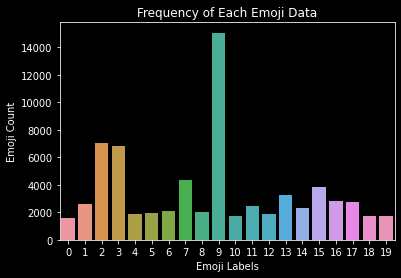

In [89]:
plt.style.use('dark_background')
sns.barplot(x = emojis, y = counts)
plt.xlabel(xlabel='Emoji Labels')
plt.ylabel(ylabel='Emoji Count')
plt.title('Frequency of Each Emoji Data')
plt.show()

# Applying Vectorization

In [90]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

In [91]:
cv_uni = CountVectorizer(dtype=np.int8)
corpus = refined_df['text']
corpus[1]

'oh wynwood funny user wynwood'

In [92]:
X_Train, X_Test, Y_train, Y_test = train_test_split(corpus, refined_df['emoji_label'], test_size=0.2, random_state=0)

In [93]:
X_train = cv_uni.fit_transform(X_Train)
X_test = cv_uni.transform(X_Test)


# Multinomial Naive Bayes

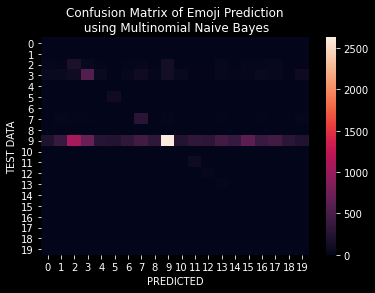

0.28414128414128415
0.1228223671343629
0.28414128414128415
0.3688483978401286


In [94]:
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
predict = MNB.predict(X_test)
confusion_matrix = metrics.confusion_matrix(predict, Y_test)
sns.heatmap(confusion_matrix)
plt.title('Confusion Matrix of Emoji Prediction\n using Multinomial Naive Bayes')
plt.xlabel('PREDICTED')
plt.ylabel('TEST DATA')
plt.show()
print(metrics.accuracy_score(predict, Y_test))
print(metrics.f1_score(predict, Y_test, average='macro'))
print(metrics.f1_score(predict, Y_test, average='micro'))
print(metrics.f1_score(predict, Y_test, average='weighted'))

In [95]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       324
           1       0.33      0.03      0.05       544
           2       0.23      0.13      0.17      1426
           3       0.35      0.41      0.38      1365
           4       0.20      0.00      0.01       393
           5       0.73      0.28      0.41       369
           6       0.30      0.01      0.01       426
           7       0.48      0.31      0.38       908
           8       1.00      0.00      0.01       393
           9       0.25      0.87      0.39      3010
          10       0.00      0.00      0.00       325
          11       0.68      0.18      0.29       471
          12       0.41      0.10      0.16       384
          13       0.37      0.06      0.11       630
          14       0.36      0.01      0.02       449
          15       0.19      0.01      0.02       725
          16       0.26      0.02      0.03       555
          17       0.09    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Multinomial Naive Bayes with hyperparameter (alpha)

In [96]:
classifier = MultinomialNB(alpha=0.1)
previous_score = 0
for alpha in np.arange(0,1,0.1):
  sub_classifier = MultinomialNB(alpha=alpha)
  sub_classifier.fit(X_train,Y_train)
  y_pred = sub_classifier.predict(X_test)
  score = metrics.accuracy_score(Y_test,y_pred)
  if score>previous_score:
        classifier=sub_classifier
  print("Alpha: {}, Score : {}".format(alpha,score))

Alpha: 0.0, Score : 0.22937222937222937


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.1, Score : 0.27112827112827115
Alpha: 0.2, Score : 0.2850707850707851
Alpha: 0.30000000000000004, Score : 0.28943228943228944
Alpha: 0.4, Score : 0.29121979121979125
Alpha: 0.5, Score : 0.29000429000429
Alpha: 0.6000000000000001, Score : 0.2902187902187902
Alpha: 0.7000000000000001, Score : 0.2887887887887888
Alpha: 0.8, Score : 0.2874302874302874
Alpha: 0.9, Score : 0.2862862862862863


In [97]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       324
           1       0.34      0.04      0.07       544
           2       0.22      0.14      0.17      1426
           3       0.35      0.42      0.38      1365
           4       0.20      0.00      0.01       393
           5       0.73      0.30      0.42       369
           6       0.31      0.01      0.02       426
           7       0.47      0.33      0.39       908
           8       0.50      0.01      0.01       393
           9       0.26      0.86      0.40      3010
          10       0.00      0.00      0.00       325
          11       0.68      0.20      0.30       471
          12       0.42      0.12      0.18       384
          13       0.32      0.06      0.11       630
          14       0.31      0.01      0.02       449
          15       0.19      0.02      0.03       725
          16       0.26      0.02      0.04       555
          17       0.08    

# Making Predictions

In [105]:
mapping = pd.read_csv('/content/drive/MyDrive/Emoji Data/Mapping.csv')
mapping = mapping.drop('Unnamed: 0', axis=1)

emoji_map = dict()

for i in range(20):
    emoji_map[i] = mapping['emoticons'][i]
    

😜
📸
😍
😂
😉
🎄
📷
🔥
😘
❤
😁
🇺🇸
☀
✨
💙
💕
😎
😊
💜
💯


In [113]:
def emoji_det(text):
    input_data = [text]
    vectorized_input_data = cv_uni.transform(input_data)
    prediction = classifier.predict(vectorized_input_data)
    print(text+emoji_map[prediction[0]])


In [114]:
emoji_det("it was funny lol")

it was funny lol😂


In [115]:
emoji_det('I love you')

I love you❤
